In [1]:
## Import Useful Libraries
import numpy as np
import random as r
from matplotlib import pyplot as plt
import gzip

In [2]:
## Lattice class
class Lattice:
    ang = np.array([[-1, -1], [-1, 0], [-1, 1], [0, 1], [1, 1], [1, 0], [1, -1], [0, -1]])
    
    def __init__(self, lattice):
        self.lattice = lattice
        self.height = lattice.shape[0]
        self.length = lattice.shape[1]
        self.sweeps_total = 0
        self.history = []
        self.compression_history = []
        
    def update(self, sweeps):
        for i in range(sweeps):
            for i in range(self.height*self.length):
                a = (r.randint(0, self.height-1), r.randint(0,self.length-1))
                b = self.get_b(a)
                a_val = self.lattice[a]
                b_val = self.lattice[b]
                self.lattice[a] = b_val
                self.lattice[b] = a_val
#                 self.history.append([a, b])
            self.compression_history.append(len(gzip.compress(self.lattice.tobytes())))
        self.sweeps_total += sweeps
        
    def get_b(self, a):
        done = True
        b = (a[0] + self.ang[r.randint(0, 7)][0], a[1] + self.ang[r.randint(0, 7)][1])
        if self.on_edge(a):
            done = False
        while not done:
            b = (a[0] + self.ang[r.randint(0, 7)][0], a[1] + self.ang[r.randint(0, 7)][1])
            done = self.check(b)
        return b
    
    def check(self, point):
        if point[1] == -1 or point[1]==self.length:
            return False
        try:
            self.lattice[point]
            return True
        except:
            return False
        
    def show(self):
        plt.imshow(self.lattice, cmap='gray')
        plt.title(f"Lattice at {self.sweeps_total} Sweeps")
    
    def on_edge(self, p):
        if p[0] == 0 or p[0] == self.height-1 or p[1] == 0 or p[1] == self.length-1:
            return True
        return False

    def current(self):
        return self.lattice
    
    def show_entropy(self):
        print(f"Sweeps: {self.sweeps_total}")
        plt.plot(self.compression_history)
        plt.xlabel("Sweeps")
        plt.ylabel("Number of Compressed bits")
        plt.title("\"Entropy\" vs Sweeps")
        
    def get_entropy(self):
        return self.compression_history

In [3]:
## Define the input lattice and then set up the class
input_lat = np.zeros([100, 100])
input_lat[:, :50] = 1
lat = Lattice(input_lat)

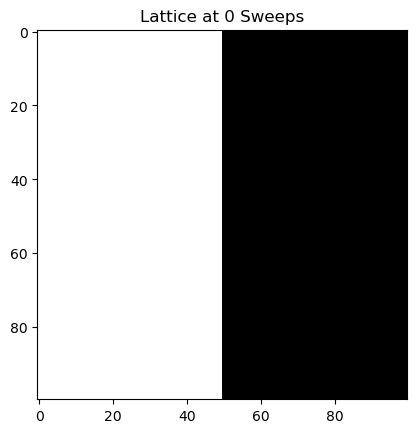

In [4]:
## Beginning State
lat.show()

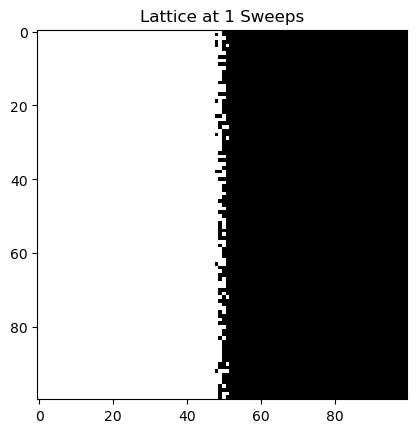

In [5]:
## 1st Sweep
lat.update(1)
lat.show()

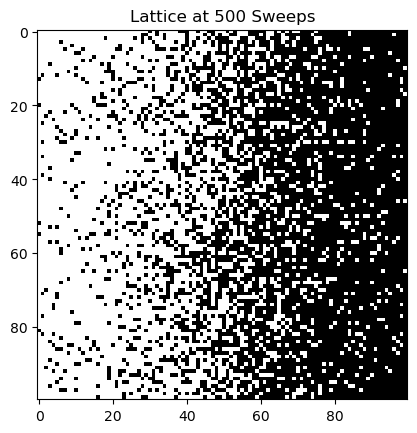

In [6]:
## 500th Sweep
lat.update(499)
lat.show()

Wall time: 46.6 s


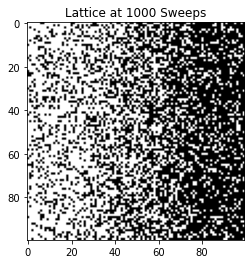

In [298]:
## 1000th Sweep
lat.update(500)
lat.show()

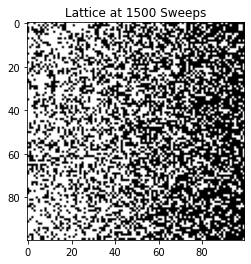

In [299]:
## 1500th Sweep
lat.update(500)
lat.show()

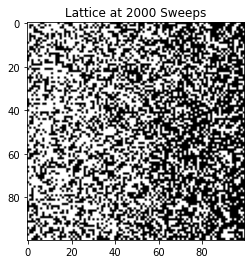

In [300]:
## 2000th Sweep
lat.update(500)
lat.show()

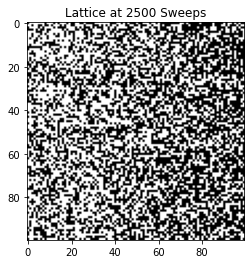

In [301]:
## 2500th Sweep
lat.update(500)
lat.show()

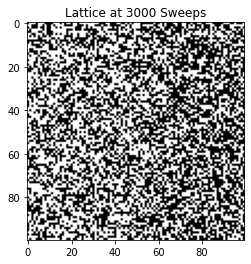

In [302]:
## 3000th Sweep
lat.update(500)
lat.show()

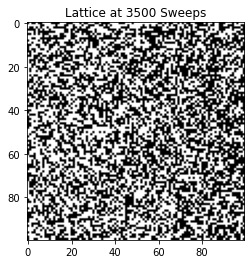

In [303]:
## 3500th Sweep
lat.update(500)
lat.show()

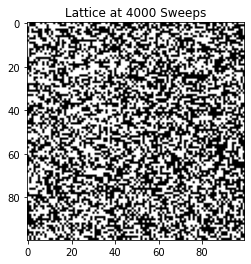

In [304]:
## 4000th Sweep
lat.update(500)
lat.show()

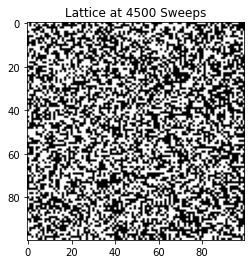

In [305]:
## 4500th Sweep
lat.update(500)
lat.show()

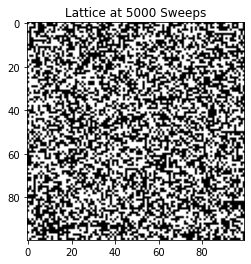

In [306]:
## 5000th Sweep
lat.update(500)
lat.show()

Sweeps: 5000


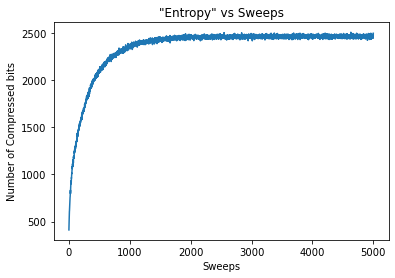

In [307]:
lat.show_entropy()

In [309]:
entropy_his = lat.get_entropy()

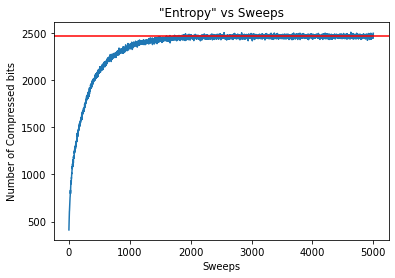

In [317]:
plt.plot(entropy_his)
plt.xlabel("Sweeps")
plt.ylabel("Number of Compressed bits")
plt.title("\"Entropy\" vs Sweeps")
plt.axhline(2470, color="red")